In [48]:
import pandas as pd
from sklearn import tree #https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Problema 1

In [77]:
estado_civil = [0, 1, 0, 1, 0]
renda = [1000, 2000, 3500, 4000, 5000]
aprovacao = [0, 1, 0, 1, 1]

df = pd.DataFrame({'estado_civil': estado_civil,
                    'renda_mensal': renda,
                    'aprovacao': aprovacao
                    })

In [78]:
df

,estado_civil,renda_mensal,aprovacao
0,0,1000,0
1,1,2000,1
2,0,3500,0
3,1,4000,1
4,0,5000,1


In [79]:
X = df[['estado_civil', 'renda_mensal']]
y = df['aprovacao']

In [80]:
clf = tree.DecisionTreeClassifier()

In [81]:
clf.fit(X, y)

DecisionTreeClassifier()

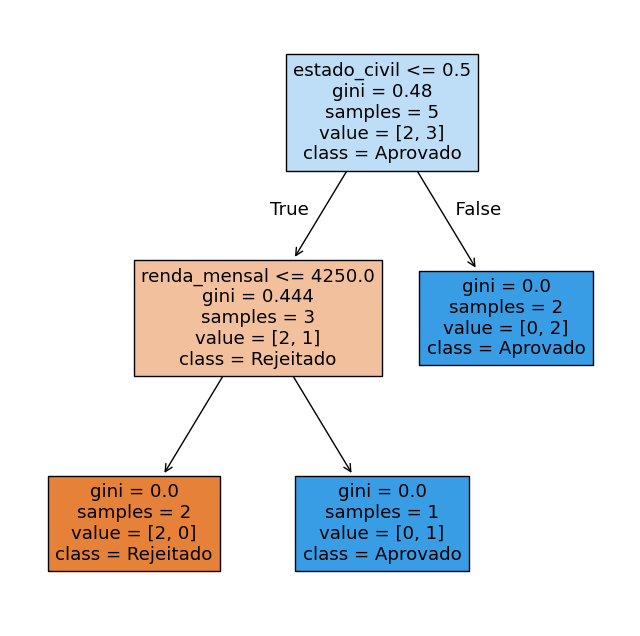

In [83]:
# Visualizando a árvore de decisão
plt.figure(figsize=(8,8))
tree.plot_tree(clf, feature_names=['estado_civil', 'renda_mensal'], class_names=['Rejeitado', 'Aprovado'], filled=True)
plt.show()

In [84]:
importances = clf.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")

estado_civil: 0.4444
renda_mensal: 0.5556


In [85]:
from sklearn.tree import export_text

regras = export_text(clf, feature_names=list(X.columns))
print(regras)

|--- estado_civil <= 0.50
|   |--- renda_mensal <= 4250.00
|   |   |--- class: 0
|   |--- renda_mensal >  4250.00
|   |   |--- class: 1
|--- estado_civil >  0.50
|   |--- class: 1



# Problema 2

In [102]:
cargo = ['Senior', 'Senior', 'Pleno', 'Junior', 'Junior', 'Junior', 'Pleno', 'Senior', 'Senior', 'Junior', 'Senior', 'Pleno', 'Pleno', 'Junior']
linguagem = ['Java', 'Java', 'Python', 'Python', 'R', 'R', 'R', 'Python', 'R', 'Python', 'Python', 'Python', 'Java', 'Python']
rede_social = [0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0]
mestrado = [0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1]
aprovacao = [False, False, True, True, True, False, True, False, True, True, True, True, True, False]

df = pd.DataFrame({'cargo': cargo,
                    'linguagem': linguagem,
                    'rede_social': rede_social,
                    'mestrado': mestrado,
                    'aprovacao': aprovacao
                    })

df['cargo'] = df['cargo'].astype('category').cat.codes
df['linguagem'] = df['linguagem'].astype('category').cat.codes

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cargo        14 non-null     int8 
 1   linguagem    14 non-null     int8 
 2   rede_social  14 non-null     int64
 3   mestrado     14 non-null     int64
 4   aprovacao    14 non-null     bool 
dtypes: bool(1), int64(2), int8(2)
memory usage: 398.0 bytes


In [104]:
df

,cargo,linguagem,rede_social,mestrado,aprovacao
0,2,0,0,0,False
1,2,0,0,1,False
2,1,1,0,0,True
3,0,1,0,0,True
4,0,2,1,0,True
5,0,2,1,1,False
6,1,2,1,1,True
7,2,1,0,0,False
8,2,2,1,0,True
9,0,1,1,0,True


In [105]:
X = df[['cargo', 'linguagem', 'rede_social', 'mestrado']]
y = df['aprovacao']

In [106]:
clf = tree.DecisionTreeClassifier()

In [107]:
clf.fit(X, y)

DecisionTreeClassifier()

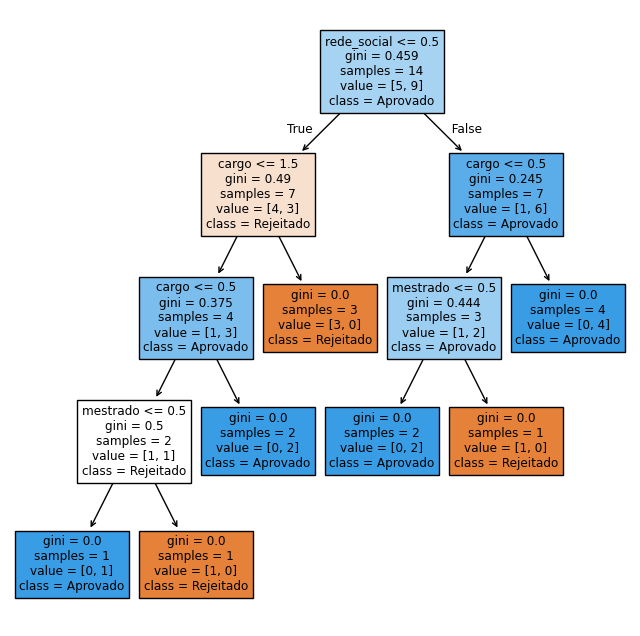

In [108]:
# Visualizando a árvore de decisão
plt.figure(figsize=(8,8))
tree.plot_tree(clf, feature_names=['cargo', 'linguagem', 'rede_social', 'mestrado'], class_names=['Rejeitado', 'Aprovado'], filled=True)
plt.show()

In [54]:
importances = clf.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")

cargo: 0.5148
linguagem: 0.0000
rede_social: 0.2000
mestrado: 0.2852


In [55]:
from sklearn.tree import export_text

regras = export_text(clf, feature_names=list(X.columns))
print(regras)

|--- rede_social <= 0.50
|   |--- cargo <= 1.50
|   |   |--- mestrado <= 0.50
|   |   |   |--- class: True
|   |   |--- mestrado >  0.50
|   |   |   |--- cargo <= 0.50
|   |   |   |   |--- class: False
|   |   |   |--- cargo >  0.50
|   |   |   |   |--- class: True
|   |--- cargo >  1.50
|   |   |--- class: False
|--- rede_social >  0.50
|   |--- cargo <= 0.50
|   |   |--- mestrado <= 0.50
|   |   |   |--- class: True
|   |   |--- mestrado >  0.50
|   |   |   |--- class: False
|   |--- cargo >  0.50
|   |   |--- class: True



# Problema 3

In [15]:
feat_names = ['Pclass', 'Sex', 'Age']
df = pd.read_csv('files/titanic_clean.csv')[feat_names + ['Survived']]
df = df.dropna().reset_index(drop=True)

In [17]:
df

,Pclass,Sex,Age,Survived
0,3,1,22.000000,0
1,1,0,38.000000,1
2,3,0,26.000000,1
3,1,0,35.000000,1
4,3,1,35.000000,0
...,...,...,...,...
886,2,1,27.000000,0
887,1,0,19.000000,1
888,3,0,29.699118,0
889,1,1,26.000000,1


In [18]:
X = df[feat_names].copy()
y = df['Survived']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [58]:
clf = tree.DecisionTreeClassifier(max_depth=3)

In [59]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

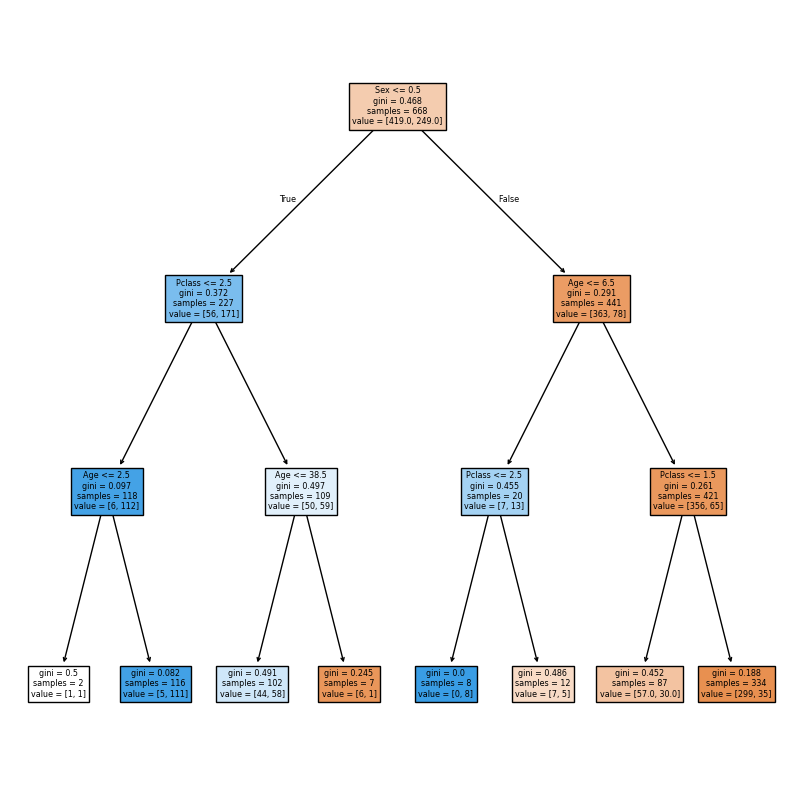

In [60]:
# Visualizando a árvore de decisão
plt.figure(figsize=(10,10))
tree.plot_tree(clf, feature_names=['Pclass', 'Sex', 'Age'], filled=True)
plt.show()

In [61]:
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(f'Acurácia: {acc:.4f}')

Acurácia: 0.7803


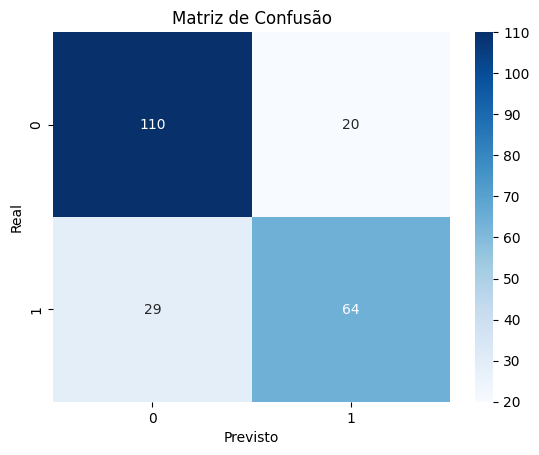

In [62]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       130
           1       0.76      0.69      0.72        93

    accuracy                           0.78       223
   macro avg       0.78      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



In [64]:
feat_importances = pd.DataFrame({'Feature': feat_names, 'Importance': clf.feature_importances_})
print(feat_importances.sort_values(by='Importance', ascending=False))


  Feature  Importance
1     Sex    0.700168
0  Pclass    0.211422
2     Age    0.088410
